# Lights, Data, Strategy: Informing Microsoft's Movie Studio with Box Office Analytics

1. Business Understanding
a) Introduction.

In an effort to tap into the growing trend of original video content and expand its footprint in the entertainment industry, Microsoft has made the strategic decision to establish its own movie studio. However, being new, Microsoft faces the challenge of understanding which types of films perform exceptionally well. To address this challenge, a data driven analysis is necessary to uncover valuable insights that can guide the decision making process regarding the types of films to start working on. 

The film industry has grown remarkably in recent years, benefiting from technological advancements such as 5G internet, higher quality displays, and smartphones. These new technologies have changed consumer preferences with regard to content access, and in the process companies like Netflix that moved in early to cater to these new appetites benefitted greatly. This shift compelled many tech giants such as Apple and Amazon to venture into movie production, aiming to capitalize on lucrative opportunities the demand presents. Recognizing the potential and profitability, Microsoft seeks to strategically navigate this market, guided by existing data and insights gleaned from it.

The primary objective of this analysis is to identify attributes successful films at the box office share, using comprehensive data sets spanning various aspects of the film industry.By examining historical records, genre trends, and audience preferences, we aim to provide actionable insights to the leadership of Microsoft's new movie studio. 
These insights will guide Microsoft in determining the types of films that are competitive and likely to thrive in this evolving market. 

Through an in-depth exploration of the available data and the application of analytics techniques, we will uncover valuable patterns, correlations, and market trends. Equipped with these data-driven insights, Microsoft will be better positioned to develop a successful film strategy, compete, and increase their chances of success.

b) Defining the metric for success. / Problem statement. 

Microsoft's new movie studio lacks domain expertise in filmmaking and needs guidance on which film genres to focus on to maximize box office success. Leveraging historical box office data and exploring genre trends, this investigation will guide the choice of films they should produce.
To address this problem we will examine datasets containing information on past movie releases, genres, and revenue from these movies. Box office revenues, ROI and ratings data will serve as indicators of financial viability and audience reception across different film genres. These elements will be examined in conjunction with other factors that contribute to a film's success, such as budget, release timing, and target audience demographics to get a more comprehensive understanding of the dynamics that drive box office success. Based on the results of our analysis, we will provide actionable insights and recommendations regarding the film genres that have historically performed well at the box office. These insights will enable Microsoft to align their movie studio's content strategy with audience preferences and market trends and increase the probaility of producing commercially successful films. 
*** To be reviewed ***
The success of our analysis will be measured by the following metrics:

Accuracy of genre performance predictions: Our analysis should accurately identify the film genres that have historically performed well at the box office, enabling Microsoft to make informed decisions.

Revenue increase: The recommendations and insights derived from our analysis should contribute to an increase in box office revenue for Microsoft's movie studio compared to randomly selecting film genres.

Market share growth: Microsoft's movie studio should gain a larger market share within the film industry by producing successful films aligned with audience preferences and market trends.
*** reviewed ***

c) Main objectives and understaning the context 
Main Objective of the Study:
The main objective of this study is to analyze historical film data and identify the most profitable film genres for Microsoft's new movie studio. Outcomes will determine the types of films to create, maximizing the chances of success.

Specific Objectives:
1. To determine the genres with the highest potential for success in the current market by analyzing genre trends and performance to identify film genres that have consistently performed well in terms of revenue and audience reception.

2. To investigate additional factors beyond genre, such as budget, release timing, and target audience demographics, to determine their impact on a film's success. This will allow us to find relationships between genre and other influential elements.

3. Based on the analysis, derive actionable insights and recommendations that align the studio's content strategy with audience preferences and market trends to increase the probability of producing commercially successful films.

d) Experimental Design
** To be updated as we go* 
1. Data collection
2.
3.
4.

e) Data relevance, data understanding. 

2. Reading the Data

In [365]:
# importing libraries. 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from collections import Counter
import ast
from fuzzywuzzy import fuzz, process

%matplotlib inline 

In [366]:
# Read the CSV files

tmdb_movies_df = pd.read_csv('data/tmdb_movies.csv')
tn_movie_budgets_df = pd.read_csv('data/tn_movie_budgets.csv', index_col=0 )
bom_movie_gross_df = pd.read_csv('data/bom_movie_gross.csv')

Inspect the contents of the dataframe df.info 

In [367]:
# inspect first 5 records in the df
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [368]:
# Looks like our import added an extra index column, we will have to drop the column and modify our df before we can proceed. 
tmdb_movies_df.drop(tmdb_movies_df.columns[0], axis= 1, inplace= True)

# Inspect our changes 
tmdb_movies_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [369]:
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 1.8+ MB


In [370]:
tmdb_movies_df.shape

(26517, 9)

What information do we obtain from checking the shape and info of the dataframe?
"""
From our range index there are 26517 rows in the tmdb_movies.csv dataframe. 
There are 8 columns in the tmdb_movies dataframe. 
Non-Null Count is the number of non-null values present in the column. All columns have 26,517 non-null values, indicating that there are no missing values in any of the columns.
Dtype refers to the data type of the values stored in the column. The DataFrame contains columns of three different data types:
    int64: Columns 'id' and 'vote_count' are of integer type.
    object: Columns 'original_language', 'original_title', 'release_date', and 'title' are of object type, which typically represents string values.
    float64: Columns 'popularity' and 'vote_average' are of floating-point type.
"""

Comparing the vote_average(rating) with popularity

Minimum Rating: 0.0
Maximum Rating: 10.0
The mean value of the ratings column is 5.991, median value is 6.0.    
The standard deviation is 1.853.


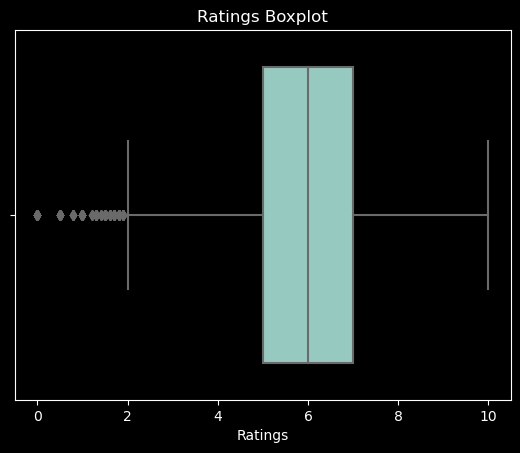

In [371]:
# Extract and anlyse ratings from tmdb
ratings_tmdb = tmdb_movies_df['vote_average']

# Calculate the minimum and maximum values
min_rating = ratings_tmdb.min()
max_rating = ratings_tmdb.max()

# Print the range of values
print("Minimum Rating:", min_rating)
print("Maximum Rating:", max_rating)


# aggregation functions. 
print(f'The mean value of the ratings column is {ratings_tmdb.mean():.3f}, median value is {ratings_tmdb.median()}.\
    \nThe standard deviation is {ratings_tmdb.std():.3f}.')

# Select the column for the boxplot
column_data = tmdb_movies_df['vote_average']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data)

# Set the title and labels
plt.title('Ratings Boxplot')
plt.xlabel('Ratings')

# Display the plot
plt.show();


On average movies in the tmdb_movies.csv dataset have received a rating of 6.0 and from median approximately 50% of the movies have a rating of below 6.0.
Standard deviation of 1.853 measures dispersion. A larger value indicates greater spread, smaller values indicate data points are clustered around the mean. 
Ratings range from 0 to 10, standard deviation of 1.853 indicates ratings have some variability but are not extremely spread out. From the boxplot, ratings below 2 can be considered as outliers. Since we are interested in movies that perform well we will drop rows with low rating. 

In [372]:
# Filter the DataFrame to keep rows where rating is greater than 2
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_average'] >= 2]

Minimum Popularity: 0.6
Maximum Popularity: 80.773


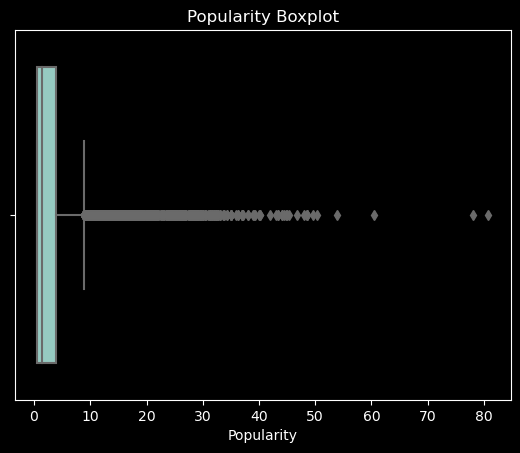

In [373]:
# Extract and anlyse popularity from tmdb
popularity_tmdb = tmdb_movies_df['popularity']

# Calculate the minimum and maximum values
min_popularity= popularity_tmdb.min()
max_popularity= popularity_tmdb.max()

# Print the range of values
print("Minimum Popularity:", min_popularity)
print("Maximum Popularity:", max_popularity)

# Select the column for the boxplot
column_data = tmdb_movies_df['popularity']

# Create the boxplot using Seaborn
sns.boxplot(x=column_data)

# Set the title and labels
plt.title('Popularity Boxplot')
plt.xlabel('Popularity')

# Display the plot
plt.show()


Unlike vote_average data, the column popularity does not have symmetric data. This box plot exhibits a negative skew, with the bulk of the data concentrated towards the right side. The median, Q1, and Q3 are all on the left side of the plot.

In [374]:
# Filter the DataFrame to get movies with popularity rating > 70
popular_movies = tmdb_movies_df[tmdb_movies_df['popularity'] > 40]

# Get the count of movies with popularity rating > 40
num_popular_movies = len(popular_movies)

# Print the result
print("Number of movies with popularity vote > 40:", num_popular_movies)

Number of movies with popularity vote > 40: 23


Very few movies had a popularity vote > 40 in the csv. The movies we wish to analyse should be representative of the industry so we will drop unpopular rows. The rating of the movie(vote_average) is influenced by the vote count. We will investigate the distribution of votes before we decide how to deal with movies with low vote count.

In [375]:
# Filter the DataFrame to keep rows where popularity is greater than or equal to 10
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['popularity'] >= 10]

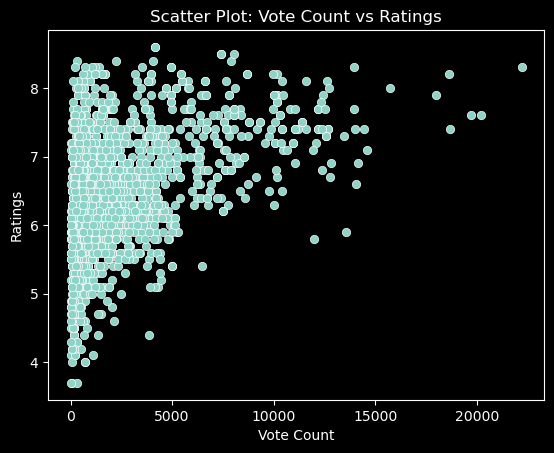

In [376]:
# we compare vote_count and rating

vote_count_data = tmdb_movies_df['vote_count']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot using Seaborn
sns.scatterplot(x=vote_count_data, y=ratings_data)

# Set the title and labels
plt.title('Scatter Plot: Vote Count vs Ratings')
plt.xlabel('Vote Count')
plt.ylabel('Ratings')

# Display the plot
plt.show()


In [377]:

# Define the percentile threshold
percentile_threshold = 75  # Keep movies with vote counts above the 75th percentile

# Calculate the vote count threshold based on the specified percentile
vote_count_threshold = tmdb_movies_df['vote_count'].quantile(percentile_threshold / 100)

# Filter the DataFrame based on the vote count threshold
tmdb_movies_df = tmdb_movies_df[tmdb_movies_df['vote_count'] >= vote_count_threshold]

tmdb_movies_df.shape


(421, 9)

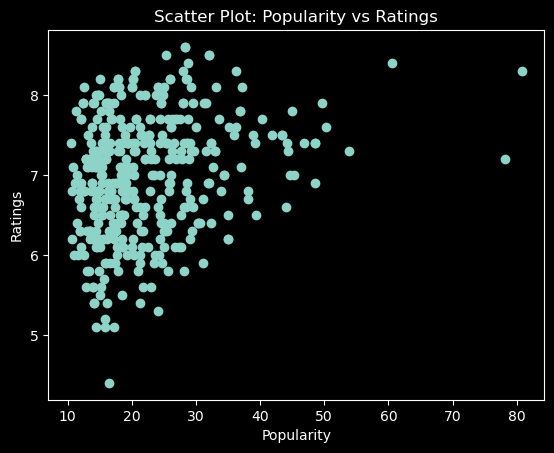

In [378]:
# Select the columns for the scatter plot
popularity_data = tmdb_movies_df['popularity']
ratings_data = tmdb_movies_df['vote_average']

# Create the scatter plot
plt.scatter(popularity_data, ratings_data)

# Set the title and labels
plt.title('Scatter Plot: Popularity vs Ratings')
plt.xlabel('Popularity')
plt.ylabel('Ratings')

# Display the plot
plt.show()


{28: 190, 12: 165, 18: 156, 878: 125, 53: 110, 35: 98, 14: 89, 10751: 63, 80: 50, 16: 48, 10749: 46, 9648: 39, 27: 27, 36: 14, 10752: 12, 37: 8, 10402: 5}


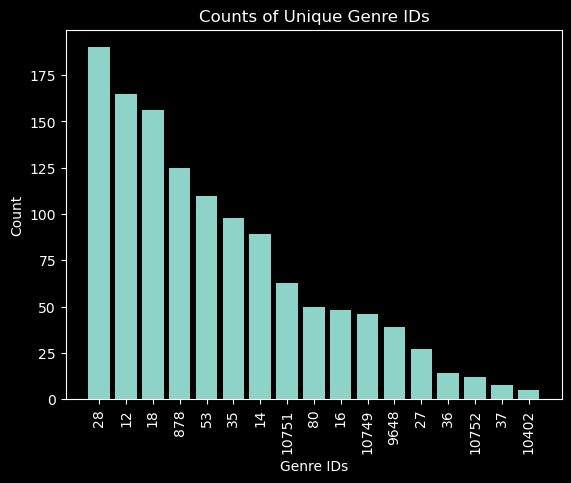

In [379]:
# Convert string representations of lists to actual lists
tmdb_movies_df['genre_ids'] = tmdb_movies_df['genre_ids'].apply(lambda x: ast.literal_eval(x))

# Flatten the lists in the 'genre_ids' column
flattened_lists = tmdb_movies_df['genre_ids'].explode().tolist()

# Count the occurrences of each item
genre_counts = dict(Counter(flattened_lists))

# Sort the dictionary by values in descending order
genre_counts = dict(sorted(genre_counts.items(), key=lambda x: x[1], reverse=True))

# Display the dictionary
print(genre_counts)

# Extract the genre IDs and counts as separate lists
genres = list(map(str, genre_counts.keys()))
counts = list(genre_counts.values())

# Create a bar plot
plt.bar(genres, counts)
plt.xlabel('Genre IDs')
plt.ylabel('Count')
plt.title('Counts of Unique Genre IDs')
plt.xticks(rotation=90)
plt.show()


Analyze the distribution of genres among successful movies. Determine which genres are more prevalent in highly rated and popular movies. You can create visualizations such as bar charts or pie charts to show the frequency of each genre.

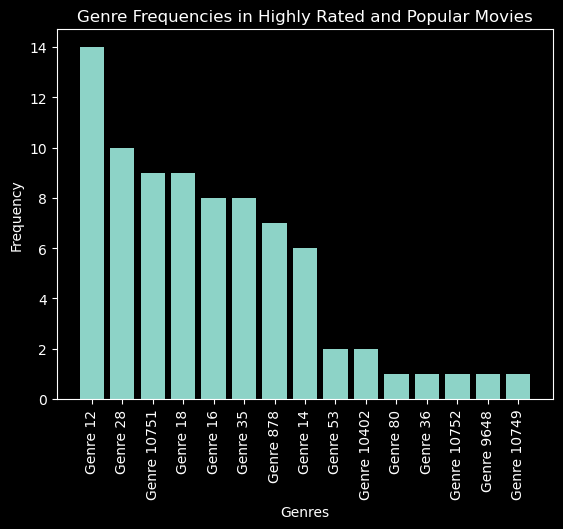

In [380]:
# Filter movies rated over 8
filtered_df = tmdb_movies_df[tmdb_movies_df['vote_average'] > 7.5]

# Calculate the 90th percentile of popularity
popularity_threshold = filtered_df['popularity'].quantile(0.75)

# Filter movies with popularity above the 90th percentile
filtered_df = filtered_df[filtered_df['popularity'] > popularity_threshold]

# Explode 'genre_ids' and count occurrences of each genre
genre_counts = filtered_df['genre_ids'].explode().value_counts()

# Get the genre labels as strings
genre_labels = ['Genre ' + str(genre_id) for genre_id in genre_counts.index]

# Plot the bar chart
plt.bar(genre_labels, genre_counts.values)
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.title('Genre Frequencies in Highly Rated and Popular Movies')
plt.xticks(rotation=90)
plt.show()


In [381]:
filtered_df.shape

(25, 9)

Investigate the distribution of languages in successful movies. Determine if movies in specific languages are more likely to achieve higher ratings and popularity.

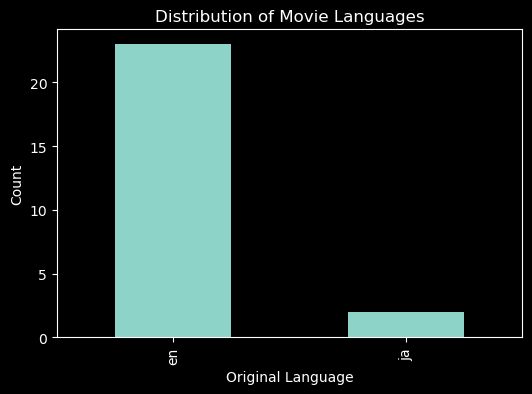

In [382]:
# Count the occurrences of each language
language_counts = filtered_df['original_language'].value_counts()

plt.figure(figsize=(6, 4))
language_counts.plot(kind='bar')
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Distribution of Movie Languages')
plt.show()


Approximately 92% of our top movies are in English. 

In [383]:
filtered_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2471,"[10751, 14, 12]",12445,en,Harry Potter and the Deathly Hallows: Part 2,29.206,2011-07-15,Harry Potter and the Deathly Hallows: Part 2,8.1,11567
2472,"[10751, 16, 18]",8587,en,The Lion King,28.583,1994-06-23,The Lion King,8.2,10160
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


Checking popularity by genre_id.

In [384]:
# Create a new column in the filtered_df DataFrame to store the count of genre IDs
filtered_df['genre_count'] = filtered_df['genre_ids'].apply(lambda x: sum(1 for genre_id in x if genre_id in genre_counts.index))

# Sort the DataFrame based on the genre_count column in descending order
sorted_df = filtered_df.sort_values('genre_count', ascending=False)

# Reset the index of the sorted DataFrame
sorted_df = sorted_df.reset_index(drop=True)

# Create a new DataFrame with only the desired columns
new_df = sorted_df.loc[:, ['genre_ids', 'id', 'title', 'original_language', 'vote_average']]

# Print the new DataFrame
print(new_df.head())


                 genre_ids      id                              title  \
0  [12, 10751, 16, 28, 35]  177572                         Big Hero 6   
1    [28, 12, 16, 878, 35]  324857  Spider-Man: Into the Spider-Verse   
2  [12, 10751, 16, 28, 35]  177572                         Big Hero 6   
3      [14, 12, 16, 10751]   10191           How to Train Your Dragon   
4      [28, 12, 16, 10751]  260513                      Incredibles 2   

  original_language  vote_average  
0                en           7.8  
1                en           8.4  
2                en           7.8  
3                en           7.7  
4                en           7.6  


In [385]:

# Perform analysis on the filtered dataset
# You can explore various aspects of successful movies, such as:
# - Genres: Analyze which genres are more prevalent in successful movies
# - Directors/Actors: Identify influential directors or actors associated with successful movies
# - Budget and revenue: Examine the relationship between budget, revenue, and success
# - Release date: Analyze if the release time or season affects the success of movies

# Example analysis: Genre distribution of successful movies
# genre_counts = filtered_movies['genre'].value_counts()
# print("Genre distribution of successful movies:")
# print(genre_counts)


In [386]:
bom_movie_gross_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [387]:
bom_movie_gross_df.shape

(3387, 5)

bom_movie_gross_df contains 5 columns: 'title', 'studio', 'domestic_gross', 'foreign_gross', and 'year'.
The are a total of 3387 rows. (RangeIndex: 3387 entries).
The 'title', 'studio', and 'foreign_gross' columns are of object data type, which typically represents strings.
The 'domestic_gross' column is of float64 data type, the 'year' column is of int64 data type.
There are missing values present in the 'studio', 'domestic_gross', and 'foreign_gross' columns. The 'foreign_gross' column has a relatively higher number of missing values compared to the other columns. 

In [388]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Additionally, we can anticipate performing data cleaning and transformation tasks, such as handling missing values and potentially converting the 'foreign_gross' column to a numeric data type.

In [389]:
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movie_gross_df[columns_w_na].isnull().mean() * 100

# Print the percentage of missing values by column
for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column, percentage_missing[column]))


Percentage of missing values in column 'studio': 0.15%
Percentage of missing values in column 'domestic_gross': 0.83%
Percentage of missing values in column 'foreign_gross': 39.86%


We drop rows with a small % of missing values. Then we evaluate missing values for the foreign_gross column to see how we handle that. 

In [390]:
# Drop rows with missing values in 'studio' and 'domestic_gross' columns
bom_movie_gross_df.dropna(subset=['studio', 'domestic_gross'], inplace= True)

# check again 
# Identify the columns with missing values
columns_w_na = ['studio', 'domestic_gross', 'foreign_gross']

# Calculate the percentage of missing values
percentage_missing = bom_movie_gross_df[columns_w_na].isnull().mean() * 100

# Print the percentage of missing values by column
for column in percentage_missing.index:
    print("Percentage of missing values in column '{}': {:.2f}%".format(column, percentage_missing[column]))

Percentage of missing values in column 'studio': 0.00%
Percentage of missing values in column 'domestic_gross': 0.00%
Percentage of missing values in column 'foreign_gross': 40.20%


In [391]:
bom_movie_gross_df['foreign_gross'].head()

0    652000000
1    691300000
2    664300000
3    535700000
4    513900000
Name: foreign_gross, dtype: object

In [392]:
# Convert 'foreign_gross' column to float, some of the data is comma separated
# Remove commas 
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].str.replace(',', '')

# Convert
bom_movie_gross_df['foreign_gross'] = bom_movie_gross_df['foreign_gross'].astype(float)

# Verify
print(bom_movie_gross_df.dtypes)



title              object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object


Percentage of missing values in column 'foreign_gross': 40.20% 
Let us see how to deal with this. 

In [393]:
columns= ['domestic_gross', 'foreign_gross']
bom_movie_gross_df[columns].describe()

,domestic_gross,foreign_gross
count,3.356000e+03,2.007000e+03
mean,2.877149e+07,7.579038e+07
std,6.700694e+07,1.381796e+08
min,1.000000e+02,6.000000e+02
25%,1.200000e+05,3.900000e+06
50%,1.400000e+06,1.940000e+07
75%,2.795000e+07,7.595000e+07
max,9.367000e+08,9.605000e+08


A very large number of missing values in this column makes it difficult to impute values. Not all values in the dataset are required since we will only be taking
data for elements that match our new_df we created previously. Opt to drop rows instead.

In [394]:
bom_movie_gross_df.dropna(subset=['foreign_gross'], inplace= True)
bom_movie_gross_df[columns].describe()

,domestic_gross,foreign_gross
count,2.007000e+03,2.007000e+03
mean,4.701984e+07,7.579038e+07
std,8.162689e+07,1.381796e+08
min,4.000000e+02,6.000000e+02
25%,6.700000e+05,3.900000e+06
50%,1.670000e+07,1.940000e+07
75%,5.605000e+07,7.595000e+07
max,9.367000e+08,9.605000e+08


From the above description:
Count is 2007, no missing values in these columns.
Mean 'domestic_gross' is approximately $47,019,840, while the mean 'foreign_gross' is approximately $75,790,380. These values represent the average gross earnings of the movies in the dataset.
Standard Deviation of 'domestic_gross' is approximately $81,626,890, and the standard deviation of 'foreign_gross' is approximately $138,179,600. A higher standard deviation indicates a greater spread of data points.
25% of the movies have domestic and foreign gross earnings lower than approximately $670,000 and $3,900,000 respectively. We will drop rows with gross lower than 50%.


In [395]:
# 25th percentile
domestic_threshold = bom_movie_gross_df['domestic_gross'].quantile(0.50)
foreign_threshold = bom_movie_gross_df['foreign_gross'].quantile(0.50)

# Drop rows where 'domestic_gross' or 'foreign_gross' is below the 25th percentile
bom_movie_gross_df = bom_movie_gross_df[(bom_movie_gross_df['domestic_gross'] >= domestic_threshold) & (bom_movie_gross_df['foreign_gross'] >= foreign_threshold)]
bom_movie_gross_df.shape


(800, 5)

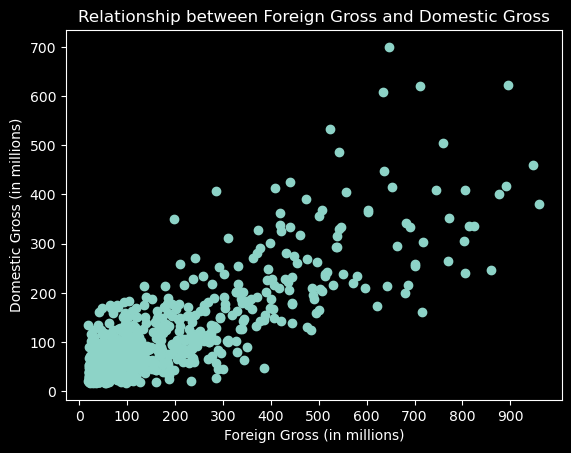

In [396]:
# Create a scatter plot
plt.scatter(bom_movie_gross_df['foreign_gross'], bom_movie_gross_df['domestic_gross'])
plt.xlabel('Foreign Gross (in millions)')
plt.ylabel('Domestic Gross (in millions)')
plt.title('Relationship between Foreign Gross and Domestic Gross')

# Set the tick values
x_ticks = range(0, int(max(bom_movie_gross_df['foreign_gross'])/1000000) + 1, 100)
y_ticks = range(0, int(max(bom_movie_gross_df['domestic_gross'])/1000000) + 1, 100)

# Convert tick values to millions
x_ticks_millions = [x * 1000000 for x in x_ticks]
y_ticks_millions = [y * 1000000 for y in y_ticks]

# Set the modified tick values
plt.xticks(x_ticks_millions, x_ticks)
plt.yticks(y_ticks_millions, y_ticks)

plt.show()



Except for outliers, the plot shows a positive correlation between domestic and foreign gross. Movies that perform well domestically are also likely to perform well internationally. We will sum the values for every row and add them to a new column 'total_gross'.

In [397]:
# Create a new column "total_gross"
bom_movie_gross_df['total_gross'] = bom_movie_gross_df['domestic_gross'] + bom_movie_gross_df['foreign_gross']

# Print the updated DataFrame
bom_movie_gross_df.head()


,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


Let us analyse the studio before trying to find its relationships with other features. 

In [398]:
# Count the number of unique studios
unique_studios = bom_movie_gross_df['studio'].nunique()

# Print the number of unique studios
print("Number of unique studios:", unique_studios)

# Calculate the count/frequency of each studio
studio_counts = bom_movie_gross_df['studio'].value_counts()

# Print the count/frequency of each studio
print("Movie count per studio:\n", studio_counts)

Number of unique studios: 35
Movie count per studio:
 Uni.           109
Fox            106
WB              99
BV              80
Sony            77
Par.            70
LGF             40
WB (NL)         37
LG/S            25
Focus           18
Wein.           17
SGem            17
FoxS            13
Rela.           12
STX             11
ORF             10
TriS             9
Sum.             8
P/DW             8
SPC              5
FD               5
W/Dim.           5
CBS              4
A24              3
PNT              2
BST              1
Annapurna        1
Studio 8         1
MGM              1
RAtt.            1
Neon             1
GrtIndia         1
EC               1
Mira.            1
Global Road      1
Name: studio, dtype: int64


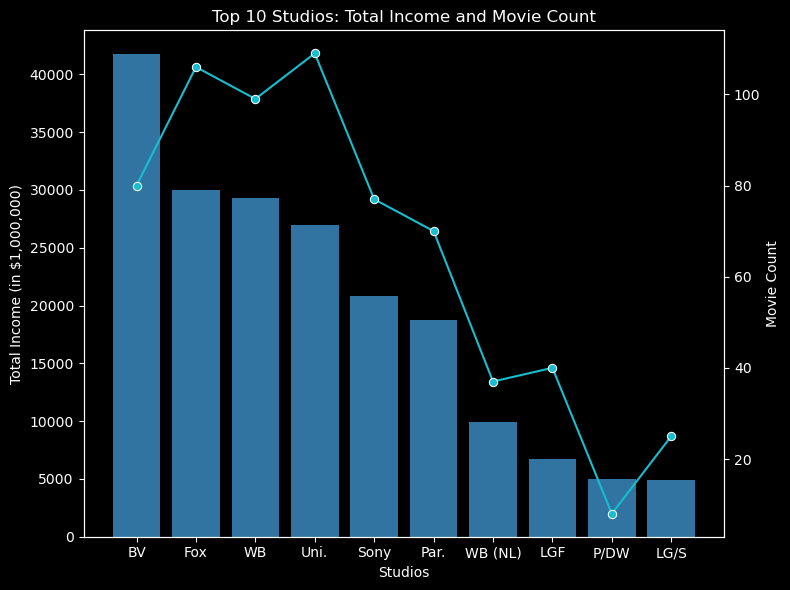

In [399]:
# Group the DataFrame by studio and calculate the sum of total_gross and count of movies for each studio
studio_summary = bom_movie_gross_df.groupby('studio').agg({'total_gross': 'sum', 'title': 'count'})

# Sort the studios in descending order based on total income and select the top 10
top_10_studios = studio_summary.nlargest(10, 'total_gross')

# Prepare the data for plotting
studios = top_10_studios.index
incomes = top_10_studios['total_gross'] / 1000000
movie_counts = top_10_studios['title']

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot the total income on the first axis
sns.barplot(x=studios, y=incomes, ax=ax1, color='tab:blue')
ax1.set_ylabel('Total Income (in $1,000,000)')
ax1.set_xlabel('Studios')

# Create the second axis for movie count
ax2 = ax1.twinx()
sns.lineplot(x=studios, y=movie_counts, ax=ax2, marker='o', color='tab:cyan')
ax2.set_ylabel('Movie Count')

# Set the title
plt.title('Top 10 Studios: Total Income and Movie Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.tight_layout()
plt.show()


In [400]:
titles_to_inspect = ['Spider-Man: Into the Spider-Verse', 'Avengers: Infinity War', 'Spirited Away', 'Logan',
                     'Spirited Away', 'Harry Potter and the Deathly Hallows: Part 1', 'The Avengers',
                     'The Lion King', 'Harry Potter and the Deathly Hallows: Part 2', 'Whiplash',
                     "To All the Boys I've Loved Before"]


# Iterate over the titles and find fuzzy matches in the bom_movie_gross_df DataFrame
for title in titles_to_inspect:
    fuzzy_matches = process.extract(title, bom_movie_gross_df['title'], limit=5)
    
    # Display the fuzzy matches and their corresponding indices
    print("Fuzzy matches for title '{}':".format(title))
    for match, score, index in fuzzy_matches:
        print("- Match: '{}' (Score: {}), Index: {}".format(match, score, index))
    print()


Fuzzy matches for title 'Spider-Man: Into the Spider-Verse':
- Match: 'Spider-Man: Into The Spider-Verse' (Score: 100), Index: 3102
- Match: 'Iron Man 2' (Score: 86), Index: 6
- Match: 'The Chronicles of Narnia: The Voyage of the Dawn Treader' (Score: 86), Index: 11
- Match: 'The King's Speech' (Score: 86), Index: 12
- Match: 'The Karate Kid' (Score: 86), Index: 14

Fuzzy matches for title 'Avengers: Infinity War':
- Match: 'War Horse' (Score: 86), Index: 366
- Match: 'This Means War' (Score: 86), Index: 775
- Match: 'World War Z' (Score: 86), Index: 1138
- Match: 'War Dogs' (Score: 86), Index: 2407
- Match: 'Sing' (Score: 64), Index: 2334

Fuzzy matches for title 'Spirited Away':
- Match: 'Ted' (Score: 90), Index: 738
- Match: 'It' (Score: 90), Index: 2770
- Match: 'Ted 2' (Score: 72), Index: 1907
- Match: 'Red' (Score: 60), Index: 38
- Match: 'Rio' (Score: 60), Index: 340

Fuzzy matches for title 'Logan':
- Match: 'Logan (2017)' (Score: 90), Index: 2772
- Match: 'Logan Lucky' (Score:

In [401]:
title_mapping = {
    "Spider-Man: Into The Spider-Verse": "Spider-Man: Into the Spider-Verse",
    "Logan (2017)": "Logan",
    "Harry Potter and the Deathly Hallows Part 2": "Harry Potter and the Deathly Hallows: Part 2",
    "The Lion King (in 3D)": "The Lion King",
    "The Avengers": "Marvel's The Avengers",
    "Harry Potter and the Deathly Hallows Part 1": "Harry Potter and the Deathly Hallows: Part 1"
}

# Create a copy of the DataFrame
bom_movie_gross_df = bom_movie_gross_df.copy()

bom_movie_gross_df.loc[:, 'title'] = bom_movie_gross_df['title'].replace(title_mapping)
bom_movie_gross_df

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows: Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
3167,The 15:17 to Paris,WB,36300000.0,20800000.0,2018,5.710000e+07
3170,Teen Titans Go! To The Movies,WB,29800000.0,22300000.0,2018,5.210000e+07
3171,Slender Man,SGem,30600000.0,21200000.0,2018,5.180000e+07
3179,Overlord,Par.,21700000.0,20000000.0,2018,4.170000e+07


In [402]:
new_df.head()

,genre_ids,id,title,original_language,vote_average
0,"[12, 10751, 16, 28, 35]",177572,Big Hero 6,en,7.8
1,"[28, 12, 16, 878, 35]",324857,Spider-Man: Into the Spider-Verse,en,8.4
2,"[12, 10751, 16, 28, 35]",177572,Big Hero 6,en,7.8
3,"[14, 12, 16, 10751]",10191,How to Train Your Dragon,en,7.7
4,"[28, 12, 16, 10751]",260513,Incredibles 2,en,7.6


In [403]:
# Merge the two datasets based on the movie titles
merged_df = new_df.merge(bom_movie_gross_df[['title', 'studio', 'total_gross']], on='title', how='left')

# Create the new DataFrame with desired columns
final_df = merged_df[['title', 'studio', 'total_gross', 'genre_ids', 'id', 'original_language', 'vote_average']]

# Display the new DataFrame
final_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              25 non-null     object 
 1   studio             19 non-null     object 
 2   total_gross        19 non-null     float64
 3   genre_ids          25 non-null     object 
 4   id                 25 non-null     int64  
 5   original_language  25 non-null     object 
 6   vote_average       25 non-null     float64
dtypes: float64(2), int64(1), object(4)
memory usage: 1.6+ KB


In [404]:
# Extract the rows with null values in the DataFrame
null_rows = final_df[final_df.isnull().any(axis=1)]

# Display the rows with null values
print(null_rows)


                                title studio  total_gross        genre_ids  \
7              Avengers: Infinity War    NaN          NaN     [12, 28, 14]   
8                       Spirited Away    NaN          NaN  [16, 10751, 14]   
11                      Spirited Away    NaN          NaN  [16, 10751, 14]   
17                       The Avengers    NaN          NaN    [878, 28, 12]   
20                           Whiplash    NaN          NaN      [18, 10402]   
23  To All the Boys I've Loved Before    NaN          NaN      [35, 10749]   

        id original_language  vote_average  
7   299536                en           8.3  
8      129                ja           8.5  
11     129                ja           8.5  
17   24428                en           7.6  
20  244786                en           8.4  
23  466282                en           7.9  


In [405]:
# final_df.reset_index(inplace=True, drop=True)
# final_df

In [406]:
final_df = final_df.dropna(axis=0)

In [407]:
final_df

,title,studio,total_gross,genre_ids,id,original_language,vote_average
0,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8
1,Spider-Man: Into the Spider-Verse,Sony,3.755000e+08,"[28, 12, 16, 878, 35]",324857,en,8.4
2,Big Hero 6,BV,6.578000e+08,"[12, 10751, 16, 28, 35]",177572,en,7.8
3,How to Train Your Dragon,P/DW,4.949000e+08,"[14, 12, 16, 10751]",10191,en,7.7
4,Incredibles 2,BV,1.242800e+09,"[28, 12, 16, 10751]",260513,en,7.6
5,Guardians of the Galaxy Vol. 2,BV,8.637000e+08,"[28, 12, 35, 878]",283995,en,7.7
6,The Imitation Game,Wein.,2.335000e+08,"[36, 18, 53, 10752]",205596,en,8.1
9,Logan,Fox,6.190000e+08,"[28, 18, 878]",263115,en,7.8
10,Deadpool,Fox,7.831000e+08,"[28, 12, 35]",293660,en,7.6
12,Harry Potter and the Deathly Hallows: Part 1,WB,9.603000e+08,"[12, 14, 10751]",12444,en,7.7


In [408]:
tn_movie_budgets_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [409]:
tn_movie_budgets_df['production_budget'].head()

id
1    $425,000,000
2    $410,600,000
3    $350,000,000
4    $330,600,000
5    $317,000,000
Name: production_budget, dtype: object

In [364]:
# Remove non-numeric characters and convert to numeric data type
tn_movie_budgets_df['production_budget'] = tn_movie_budgets_df['production_budget'].str.replace(r'[^0-9]', '', regex=True).astype(float)

tn_movie_budgets_df['production_budget'].head()


AttributeError: Can only use .str accessor with string values!

Identiy and handle missing values

In [51]:
clean the data, text files numbers etc

SyntaxError: invalid syntax (2186987313.py, line 1)

Explore data distributions matplotlib

Explore differences between subsets

In [ ]:
Explore correlations

In [ ]:
Engineer and explore new features